# **Importing libraries and dataset**

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/advertising_sales_data.xlsx")
df

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9
...,...,...,...,...,...
195,camp196,38.2,3.7,13.8,7.6
196,camp197,94.2,4.9,8.1,14.0
197,camp198,177.0,9.3,6.4,14.8
198,camp199,283.6,42.0,66.2,25.5


In [ ]:
df.isnull().sum()

,0
Campaign,0
TV,0
Radio,2
Newspaper,0
Sales,0


In [ ]:
df['Radio'].fillna(df['Radio'].mean(), inplace=True)

<ipython-input-41-3245654235>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Radio'].fillna(df['Radio'].mean(), inplace=True)


In [ ]:
df.isnull().sum()

,0
Campaign,0
TV,0
Radio,0
Newspaper,0
Sales,0


# **1.	What is the average amount spent on TV advertising in the dataset?**

---



In [ ]:
df['TV'].mean()

np.float64(147.0425)

In [ ]:
avg_tv = df['TV'].mean()
print(f"Average TV Spend: ${avg_tv:.2f}")

Average TV Spend: $147.04


**Ans.** 147.0425

# **2.	What is the correlation between radio advertising expenditure and product sales?**

---



In [ ]:
correlation = df['Radio'].corr(df['Sales'])
correlation

np.float64(0.3496507429302875)

0.35 -> Weak positive correlation.

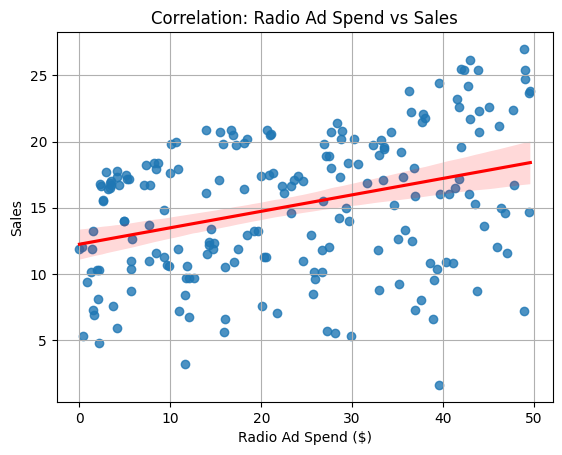

In [ ]:
sns.regplot(x='Radio', y='Sales', data=df, line_kws={'color': 'red'})
plt.title('Correlation: Radio Ad Spend vs Sales')
plt.xlabel('Radio Ad Spend ($)')
plt.ylabel('Sales')
plt.grid(True)

# **3. Which advertising medium has the highest impact on sales based on the dataset?**

---



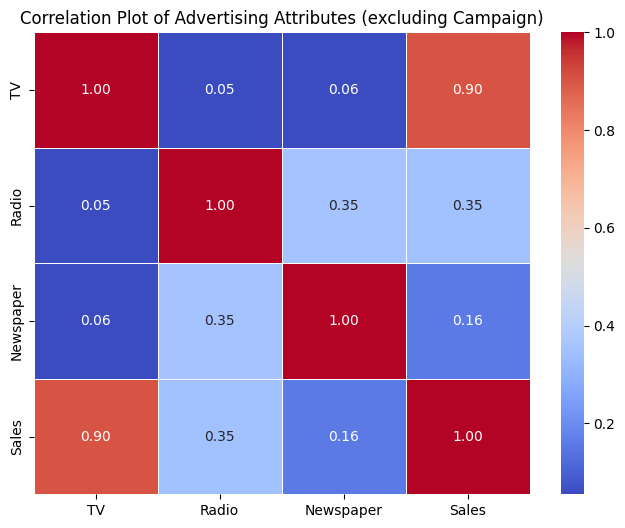

In [ ]:
corr_matrix = df.drop('Campaign', axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot of Advertising Attributes (excluding Campaign)')
plt.show()

In [ ]:
correlations = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()
print(correlations['Sales'].drop('Sales'))

TV           0.901208
Radio        0.349651
Newspaper    0.157960
Name: Sales, dtype: float64


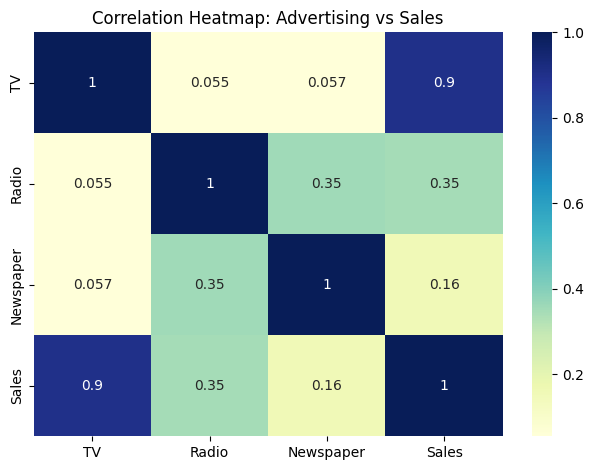

In [ ]:
sns.heatmap(df[['TV', 'Radio', 'Newspaper', 'Sales']].corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap: Advertising vs Sales")
plt.tight_layout()
plt.show()

This implies tat TV has the highest impact on sales.

# **4. Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.**

---



**Splitting the dataset:**

In [ ]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train)

[[116.     7.7   23.1 ]
 [177.     9.3    6.4 ]
 [ 43.1   26.7   35.1 ]
 [ 62.3   12.6   18.3 ]
 [224.     2.4   15.6 ]
 [ 38.2    3.7   13.8 ]
 [ 70.6   16.    40.8 ]
 [147.3   23.26  19.1 ]
 [104.6    5.7   34.4 ]
 [ 76.3   27.5   16.  ]
 [ 78.2   46.8   34.5 ]
 [168.4    7.1   12.8 ]
 [  8.7   48.9   75.  ]
 [  7.8   38.9   50.6 ]
 [ 76.4    0.8   14.8 ]
 [129.4    5.7   31.3 ]
 [ 73.4   17.    12.9 ]
 [289.7   42.3   51.2 ]
 [ 19.6   20.1   17.  ]
 [197.6    3.5    5.9 ]
 [284.3   10.6    6.4 ]
 [184.9   21.    22.  ]
 [112.9   17.4   38.6 ]
 [ 23.8   35.1   65.9 ]
 [290.7    4.1    8.5 ]
 [ 19.4   16.    22.3 ]
 [293.6   27.7    1.8 ]
 [ 18.7   12.1   23.4 ]
 [134.3    4.9    9.3 ]
 [ 25.6   39.     9.3 ]
 [100.4    9.6    3.6 ]
 [ 80.2    0.     9.2 ]
 [188.4   18.1   25.6 ]
 [177.    33.4   38.7 ]
 [125.7   36.9   79.2 ]
 [209.6   20.6   10.7 ]
 [142.9   29.3   12.6 ]
 [184.9   43.9    1.7 ]
 [222.4    4.3   49.8 ]
 [241.7   38.    23.2 ]
 [ 17.2   45.9   69.3 ]
 [120.5   28.5  

**Training the model:**

---


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

 **Predicting the test set**




---



In [ ]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[17.03 16.9 ]
 [20.41 22.4 ]
 [23.72 21.4 ]
 [ 9.27  7.3 ]
 [21.68 24.7 ]
 [12.57 12.6 ]
 [21.08 22.3 ]
 [ 8.69  8.4 ]
 [17.24 16.5 ]
 [16.67 16.1 ]
 [ 8.92 11.  ]
 [ 8.48  8.7 ]
 [18.21 16.9 ]
 [ 8.07  5.3 ]
 [12.65 10.3 ]
 [14.93 16.7 ]
 [ 8.13  5.5 ]
 [17.9  16.6 ]
 [11.01 11.3 ]
 [20.48 18.9 ]
 [20.81 19.7 ]
 [12.6  12.5 ]
 [10.91 10.9 ]
 [22.39 22.2 ]
 [ 9.42 11.3 ]
 [ 7.93  8.1 ]
 [20.84 21.7 ]
 [13.82 13.4 ]
 [10.77 10.6 ]
 [ 7.93  5.7 ]
 [15.96 15.6 ]
 [10.64 11.3 ]
 [20.8  23.7 ]
 [10.43  8.7 ]
 [21.58 16.1 ]
 [21.18 20.7 ]
 [12.13 11.6 ]
 [22.81 20.8 ]
 [12.61 11.9 ]
 [ 6.46  6.9 ]]


**Visualising Training Sety Results:**

---



In [ ]:
print(y_test.shape, y_pred.shape)

(40,) (40,)


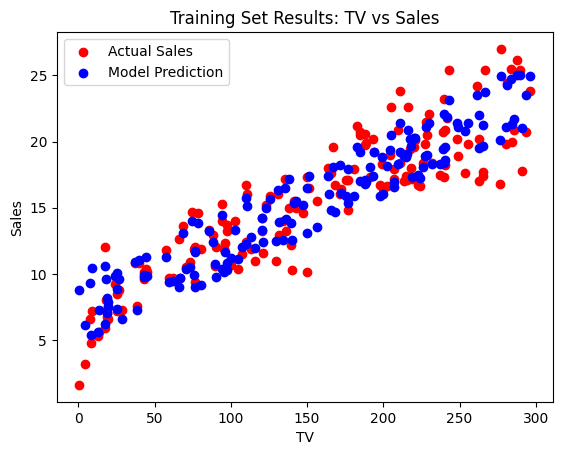

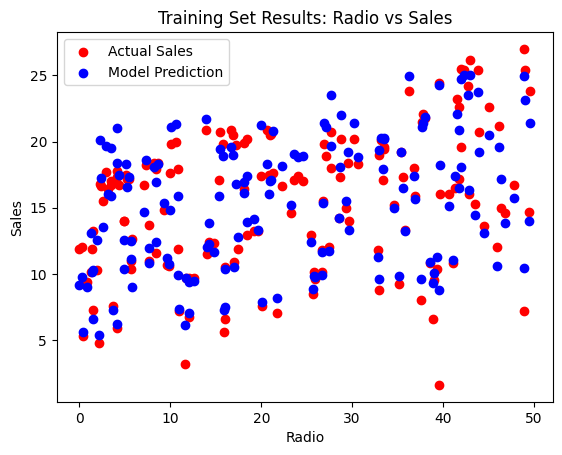

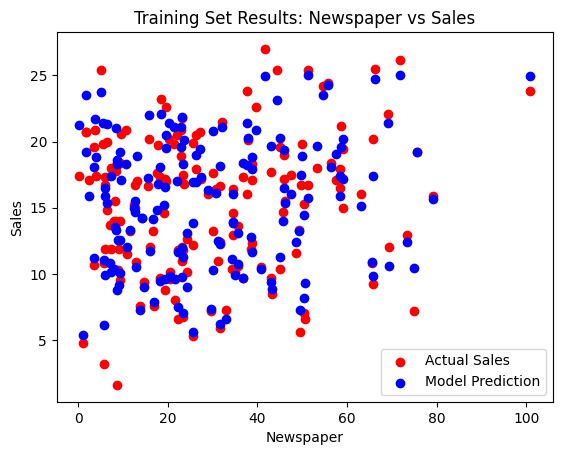

In [ ]:
feature_names = ['TV', 'Radio', 'Newspaper']

for i in range(x_train.shape[1]):
    plt.scatter(x_train[:, i], y_train, color="red", label="Actual Sales")
    plt.scatter(x_train[:, i], regressor.predict(x_train), color="blue", label="Model Prediction")
    plt.title(f"Training Set Results: {feature_names[i]} vs Sales")
    plt.xlabel(feature_names[i])
    plt.ylabel("Sales")
    plt.legend()
    plt.show()


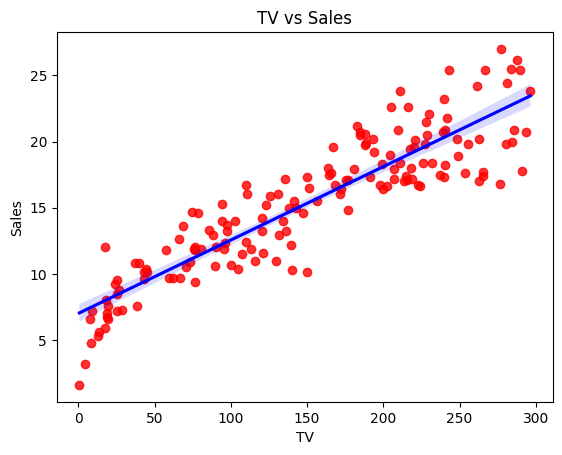

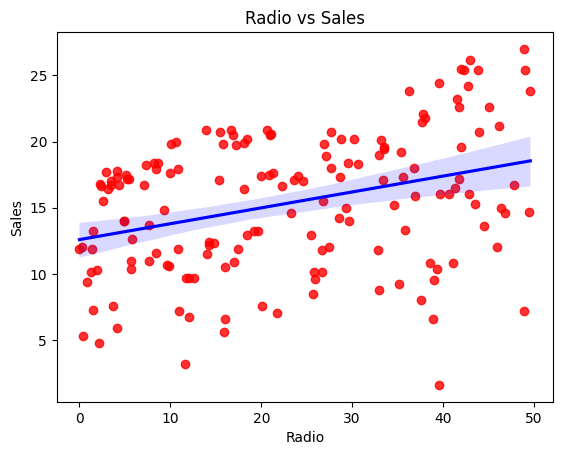

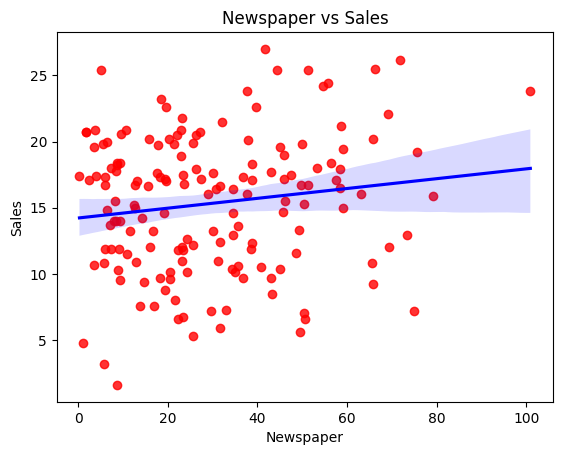

In [ ]:
train_df = pd.DataFrame(x_train, columns=feature_names)
train_df["Sales"] = y_train

for feature in feature_names:
    sns.regplot(x=feature, y="Sales", data=train_df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
    plt.title(f"{feature} vs Sales")
    plt.show()


**Test Set Results**

---




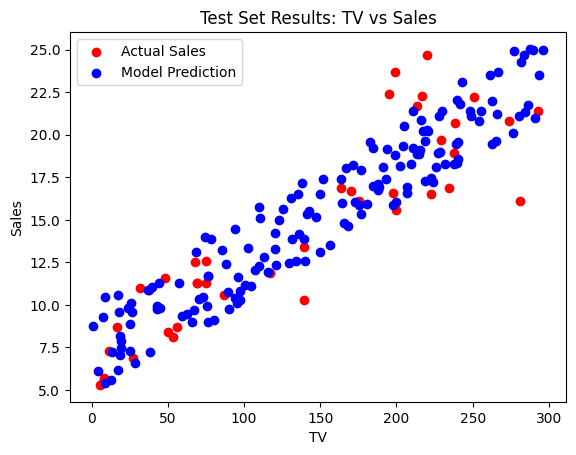

In [ ]:
plt.scatter(x_test[:, 0], y_test, color="red", label="Actual Sales")
plt.scatter(x_train[:, 0], regressor.predict(x_train), color="blue", label="Model Prediction")
plt.title("Test Set Results: TV vs Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()

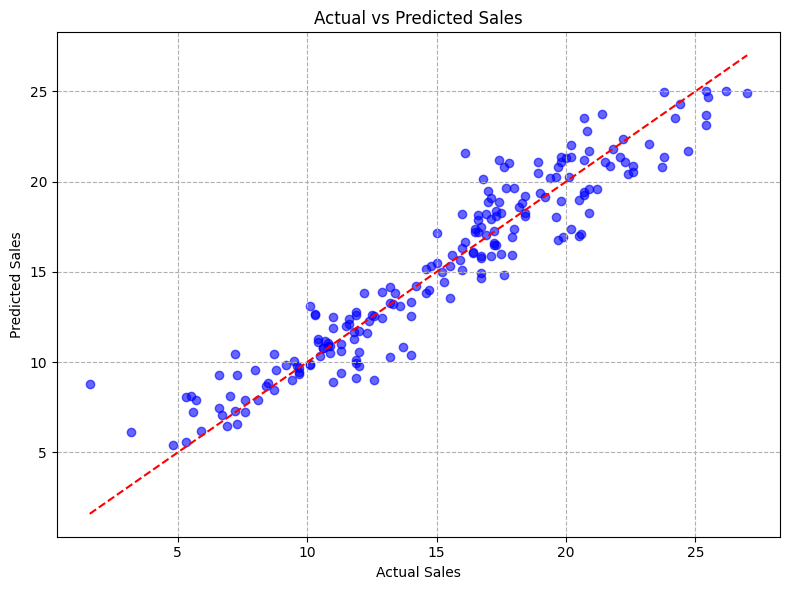

In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

y_pred = regressor.predict(x)

plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

# **5. How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?**

---



In [ ]:
print(f"Predicted Sales : {regressor.predict([[200,40,50]])[0]:.0f}")

Predicted Sales : 20


# **6.	How does the performance of the linear regression model change when the dataset is normalized?**

---



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

regressor.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)
y_pred_scaled = regressor.predict(x_test_scaled)

**Plot Comparison**

---



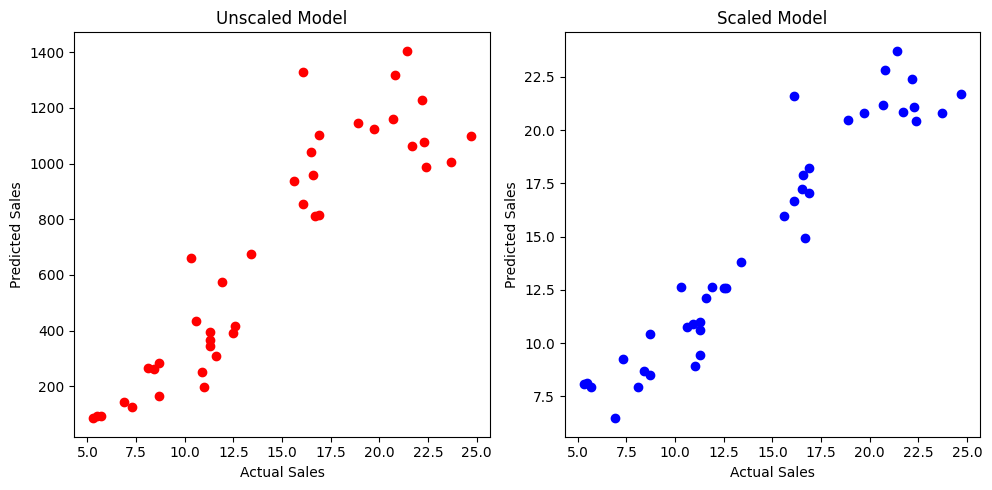

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='red')
plt.ylabel("Predicted Sales")
plt.xlabel("Actual Sales")
plt.title("Unscaled Model")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_scaled, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Scaled Model")

plt.tight_layout()
plt.show()

In [ ]:
# Calculate R2 score for the unscaled model on the test set
r2_unscaled = r2_score(y_test, y_pred)
print(f"R² score for the unscaled model: {r2_unscaled:.3f}")

# Calculate R2 score for the scaled model on the test set
r2_scaled_test = r2_score(y_test, y_pred_scaled)
print(f"R² score for the scaled model: {r2_scaled_test:.3f}")

R² score for the unscaled model: -19625.894
R² score for the scaled model: 0.906


In [ ]:
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")
print(f"Shape of y_pred_scaled: {y_pred_scaled.shape}")

Shape of y_test: (40,)
Shape of y_pred: (200,)
Shape of y_pred_scaled: (40,)


#**7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?**
---



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

X_limited = df[['Radio', 'Newspaper']]
y = df['Sales']

x_train_lim, x_test_lim, y_train_lim, y_test_lim = train_test_split(X_limited, y, test_size=0.2, random_state=42)

model_limited = LinearRegression()
model_limited.fit(x_train_lim, y_train_lim)

y_pred_lim = model_limited.predict(x_test_lim)

r2_lim = r2_score(y_test_lim, y_pred_lim)
mse_lim = mean_squared_error(y_test_lim, y_pred_lim)

print(f"R² using Radio & Newspaper only: {r2_lim:.3f}")
print(f"Mean Squared Error: {mse_lim:.3f}")

R² using Radio & Newspaper only: 0.110
Mean Squared Error: 27.502


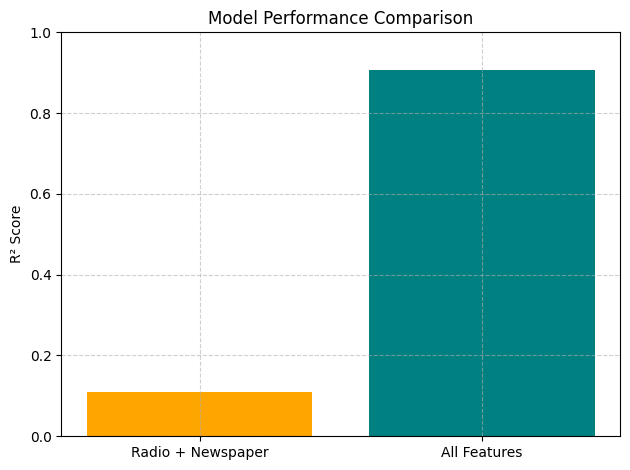

In [ ]:
import matplotlib.pyplot as plt

models = ['Radio + Newspaper', 'All Features']
scores = [r2_lim, r2_scaled_test]

plt.bar(models, scores, color=['orange', 'teal'])
plt.ylabel('R² Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()